In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

2023-04-24 21:01:58.845337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
   
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    
    data = normalize(data)
    return data

def normalize(signal):
    if signal.std() == 0:
        return signal
    return (signal - signal.mean()) / signal.std()

def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## create iPhone13_I own Models

## iPhone13_I dataset
the very first dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[-0.04094758+0.7403925j  -1.2457979 -0.46445787j -0.6433727 -0.46445787j
 ...  0.5614776 +0.1379673j   0.5614776 +0.1379673j
  1.1639028 -1.066883j  ]
2048
77387
(2048, 77387)
[0.21128763 0.11525805 0.07911973 ... 0.07200941 0.0757337  0.12055532]
(10000, 2048)
(10000,)
[-0.59611106+0.6811873j  -0.59611106-0.43906635j -0.03598427-0.43906635j
 ... -0.03598427+1.241314j   -0.03598427-0.43906635j
 -0.03598427-0.43906635j]
2048
81265
(2048, 81265)
[0.11910544 0.08144721 0.0712228  ... 0.07138769 0.08515362 0.08866709]
(20000, 2048)
(20000,)
[ 1.0650288+0.69148296j  1.0650288+0.14122179j -0.0354936+0.14122179j ...
  0.5147676+0.69148296j  0.5147676+0.14122179j -0.0354936-0.95930064j]
2048
82947
(2048, 82947)
[0.22773421 0.11793426 0.07490409 ... 0.06576841 0.06908313 0.1137925 ]
(30000, 2048)
(30000,)
[-1.0360122 +1.6226187j  -1.0360122 -0.38390732j -0.03274924-0.38390732j
 ... -0.03274924-1.3871703j   0.46888226+0.6193557j
 -0.53438073+0.6193557j ]
2048
82654
(2048, 82654)
[0.21464762 0.11

In [4]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_normalization/i13_I_normalize_scatter.pdf')

ValueError: at least one array or dtype is required

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_normalization/iPHONE13_I_normalize_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 15s 6ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1024
Epoch 2/30
2532/2532 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1024
Epoch 3/30
2532/2532 [==============================] - 15s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1024
Epoch 4/30
2532/2532 [==============================] - 15s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1024
Epoch 5/30
2532/2532 [==============================] - 15s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1024
Epoch 6/30
2532/2532 [==============================] - 15s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1024
Epoch 7/30
2532/2532 [==============================] - 15s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1024
Epoch 8/30
2532/2532 [=====

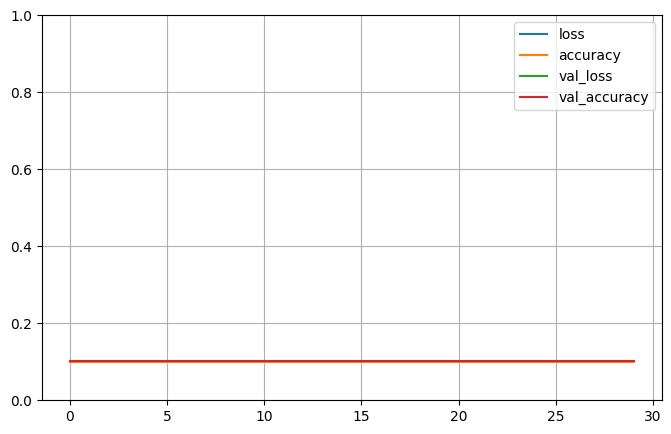

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")

In [9]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1011
test loss, test acc: [nan, 0.10109999775886536]


In [10]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 2ms/step
[0 0 0 ... 0 0 0]
0


In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 993    0    0    0    0    0    0    0    0    0]
 [ 939    0    0    0    0    0    0    0    0    0]
 [1043    0    0    0    0    0    0    0    0    0]
 [1027    0    0    0    0    0    0    0    0    0]
 [ 999    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1003    0    0    0    0    0    0    0    0    0]
 [1001    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1011
           1       0.00      0.00      0.00      1010
           2       0.00      0.00      0.00       993
           3       0.00      0.00      0.00       939
           4       0.00      0.00      0.00      1043
           5       0.00      0.00      0.00      1027
           6       0.00      0.00      0.00       999
           7       0.00      0.00   

Test Accuracy:0.1011


Text(0.5, 1.0, 'Accuracy:0.101')

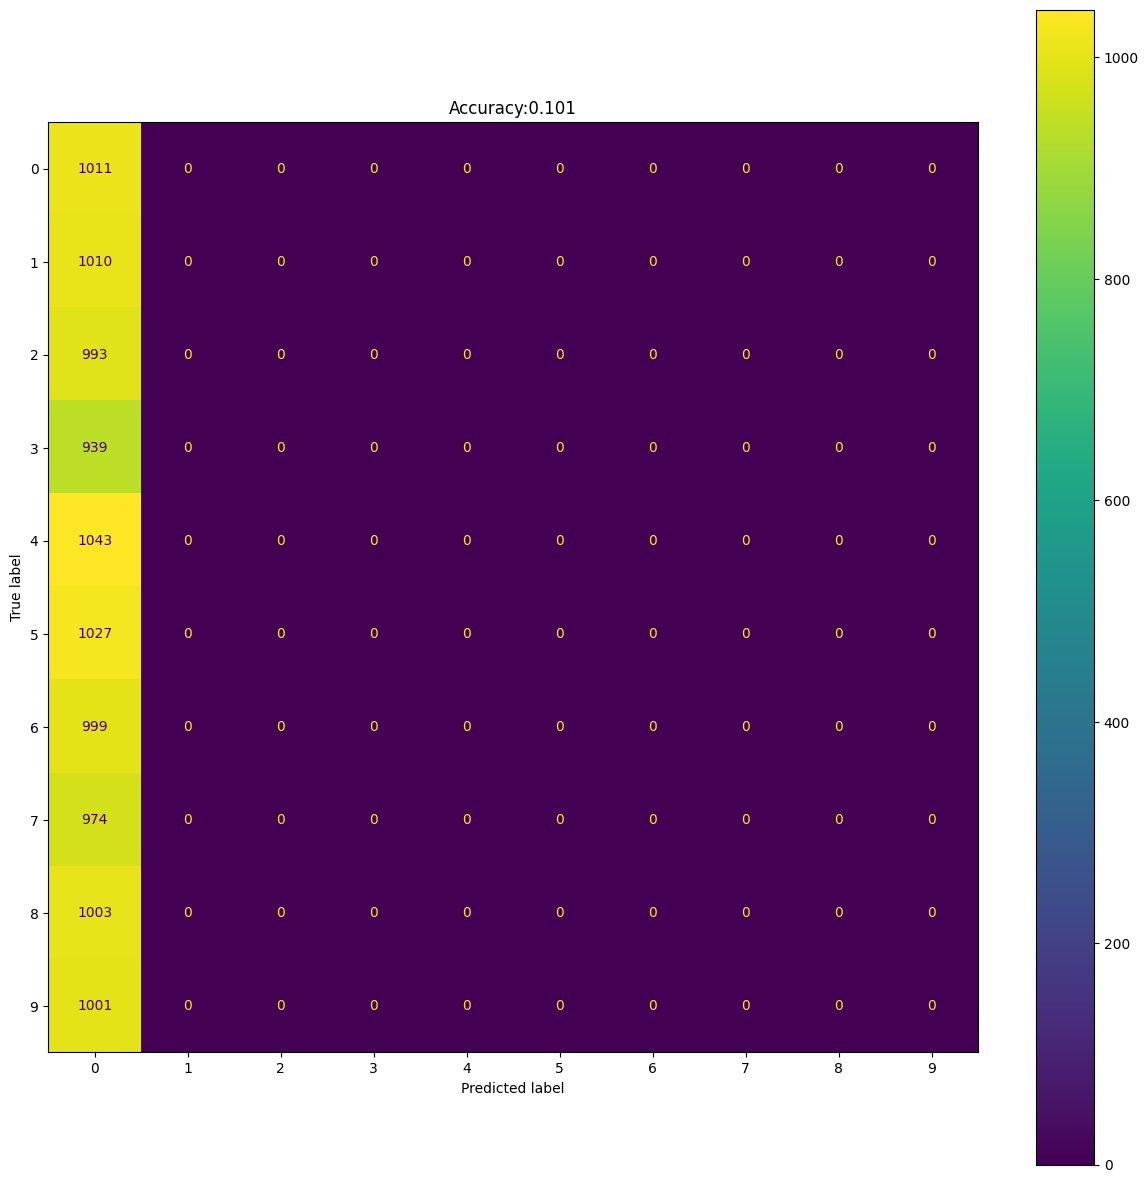

In [12]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_BeSh dataset

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone13_Beer Sheve,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

In [ ]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13_I_BeSh_scatter.pdf')

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone13_I(ii) dataset

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone13/iPhone13_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone13_I(iii) dataset

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_(iii)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

In [ ]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13_I(iii)_scatter.pdf')

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 dataset

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_data1/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallary_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

In [ ]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13I_data1_scatter.pdf')

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 dataset

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_data2/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

In [ ]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13I_data2_scatter.pdf')

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II Own Model

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

In [ ]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13II_scatter.pdf')

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III Own Model

In [ ]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

In [ ]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/i13III_scatter.pdf')

In [ ]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/accuracy_and_loss_iPhone13_III.pdf')

In [ ]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')